#**PROJECT 4: MNIST DIGIT RECOGNITION** 
In this project, you will build two different convolutional neural networks (CNN) for recognising hand written digits. The project deals with multi-classification where the model (neural network) classifies a 28 x 28 sized image of a digit to be one of the 10 classes (0, 1,..9). We use MNIST data to train the models.  You will be using TensorFlow layers to implement CNN models. After completing this assignment you will learn.
* How to build and implement CNN architectures using `keras` API of TensorFlow.
* Training and testing of deep learning models with MNIST hand written digit dataset. 
* Implementation of existing erchitectures, e.g., LeNet (Lecun et al. 1998) and Mini VGGNet model for digit recognition.
* Setting various hyperparameters of your CNNfor its training.
* Evaluation and visualization of the performance of your trained model.

There are **five activities** for you to complete. You are expected to complete the first activity in this recitation. You can comiplete the ectaivities related to miniVGG in the next recitation.

As ussual, before executing the following python code, you have to upload the `Digit_Recognition` folder to your Google drive. Download the project from github repo and upload it into the `My Drive/Colab Notebooks` of your google drive.Then mount the google drive and set the working directory to `My Drive/Colab Notebooks/Digit_Recognition`.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
root_dir = "/content/gdrive/MyDrive/"
project_folder = "Colab Notebooks/Digit_Recognition/"
os.chdir(root_dir+project_folder)

First, let us import some essential libraries and functions (including the optimizer (`SGD`), dataset (`MNIST`)) needed for our project. We will use functions from  `keras` and `sklearn` libraries. `Keras` (https://keras.io/) is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. You have already used some of the functions from `sklearn` (https://scikit-learn.org/stable/) for the feature matching project.

In [ ]:
# import the necessary packages
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

# **1. Data Loading and Pre-processing** 
For our digit recognition model we will use MNIST dataset (Link: http://yann.lecun.com/exdb/mnist/ ). The MNIST dataset is an acronym for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9, see the figure below for some examples.




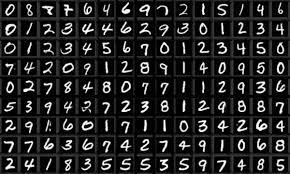

The main task with this dataset is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively. It is a widely used and deeply understood dataset and, for the most part, is “solved.” Top-performing models are mostly deep learning convolutional neural networks that achieve a classification accuracy of above 99%, with an error rate between 0.4 %and 0.2% on the hold out (test) dataset.

Let us first download the MNIST dataset from the Keras API. You can use the `load_data()` function from `mnist` for this purpose. The function loads training data, test data and the labels to the respective arrays.

In [ ]:
# ------ Import the dataset
print("[INFO] accessing MNIST Dataset...")
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

Now let us check the shapes of the loaded data and visualize them to better understand its content.

In [ ]:
# summarize loaded dataset
print('Train: Images=%s, Labels=%s' % (trainData.shape, trainLabels.shape))
print('Test: Images=%s, Labels=%s' % (testData.shape, testLabels.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainData[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

As you can see there as 60,000 labelled training data and 10,000 testing data inside the MNIST dataset.

Now we need to make sure if the input images shape are adaptable for `keras` backend by checking if the shape of input shoud be (width X height X channel) or (channel X width X height). If not, we should reshape the training and test data. You just need to check whether the `depth` (no. of channels) is expressed as first or last and then reshape the training and test data accordingly.

In [ ]:
# ------ Verify data channel order - channels first
if K.image_data_format() == "channels_first":
	trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))
	testData = testData.reshape((testData.shape[0], 1, 28, 28))

# ------ Channels last
else:
	trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
	testData = testData.reshape((testData.shape[0], 28, 28, 1))


Next, let us normalize the images of the dataset. Main purpose of normalization is to make computation efficient by reducing the pixel values to 0 to 1. Normalization also calibrate the different pixels intensities into a normal distribution which makes the image looks better for the visualizer. We use `float32` data tyoe to represent the values for efficiency reasons. No need to allocate longer data type, e.g., `float64`.


In [ ]:
# ------ normalize the inputs
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

We need to convert the labels from integers to vectors so that we can feed the labels correctly into the model while  training and testing. 

In the training, the network behaves as a binary classifier per class. So we need to convert multi-class labels to binary labels (belong or does not belong to the class). LabelBinarizer makes this process easy with the transform method. The `transform()` method creates columns corresponding to each label and set that label to 1 and all other labels to 0.

In [ ]:
# ------ convert the labels from integers to column vectors
label_binarizer = LabelBinarizer()
trainLabels = label_binarizer.fit_transform(trainLabels)
testLabels = label_binarizer.transform(testLabels)

# **2. Build and Train the LeNet Model (25%)** 

Lenet-5 is one of the earliest pre-trained models proposed by Yann LeCun and others in the year 1998, in the research paper Gradient-Based Learning Applied to Document Recognition. They used this architecture for recognizing the handwritten and machine-printed characters. The LeNet architecture is an excellent “first architecture” for Convolutional Neural Networks (especially when trained on the MNIST dataset, an image dataset for handwritten digit recognition).

LeNet is small and easy to understand — yet large enough to provide interesting results. Furthermore, the combination of LeNet + MNIST is able to run on the CPU, making it easy for beginners to take their first step in Deep Learning and Convolutional Neural Networks.




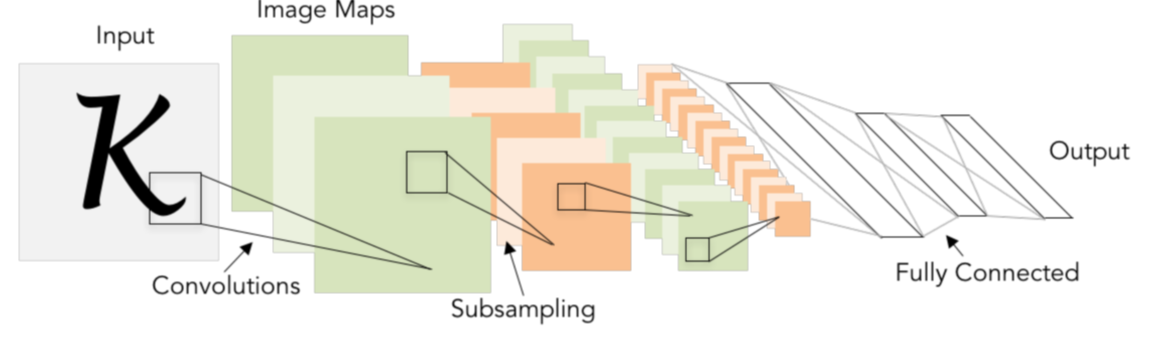

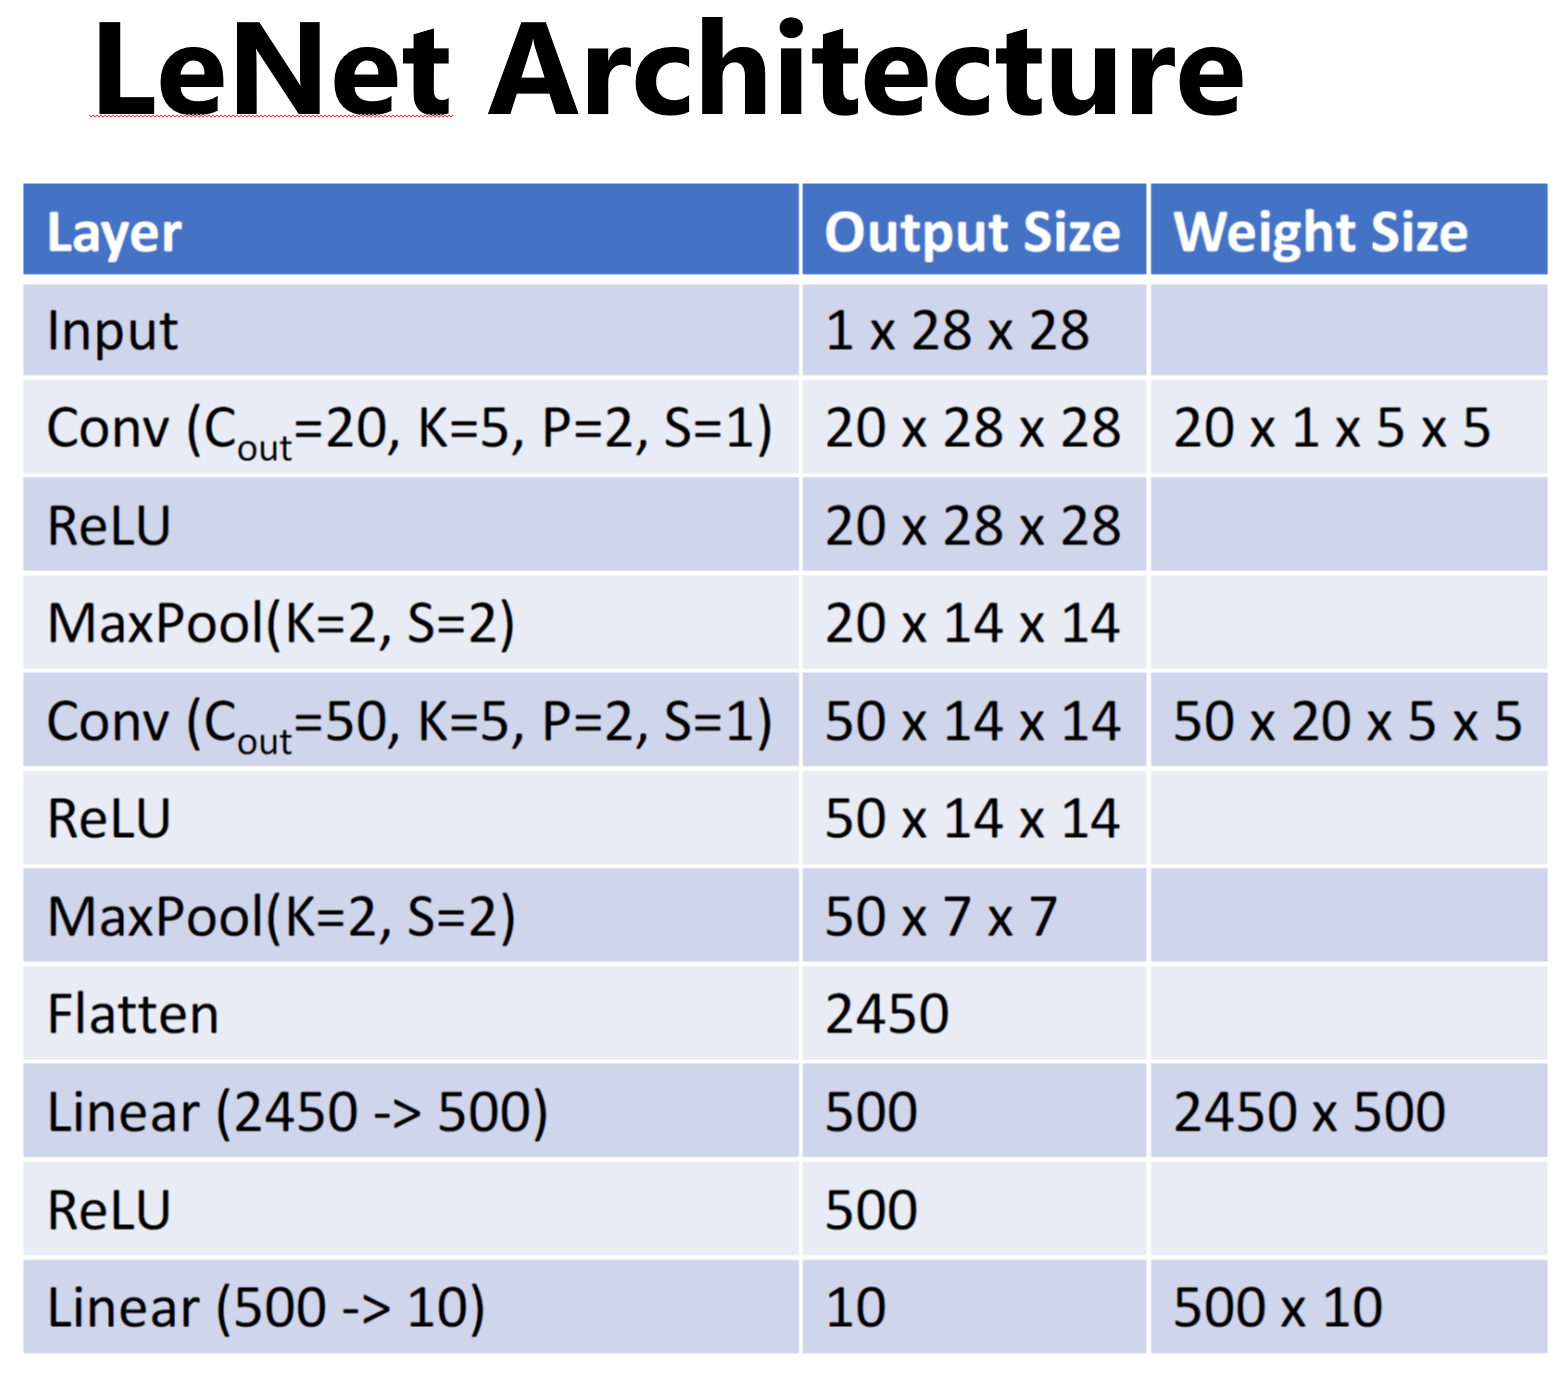

Description of various layers and syntaxes, e.g.,`Sequential()`, `Conv2D()`, `MaxPooling2D()`, `Flatten()`, and `Dense()` are available in the "Introduction to Tensorflow" presentation. We strongly recommend you to refer to the slides for details. Alternatively, you can refer to the syntaxes at https://www.tensorflow.org/api_docs/python/tf/keras/layers

Now, let us build the LeNet model as described above. We have filled out the first [Conv, ReLU, Pool] part for you. Your task is to replicate [Conv, ReLU, Pool] part with appropriate arguments used in the LeNet architecture (See the above table to get the argument values)

In [ ]:
# Graded Activity: 1

#import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

class LeNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model
		model = Sequential()
		inputShape = (height, width, depth)

		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)

		# first set of CONV => RELU => POOL layers
		model.add(Conv2D(20, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# second set of CONV => RELU => POOL layers. Refer to the architecture description above and complete
		model.add(_____________)
		model.add(_____________)
		model.add(_____________)

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

The following code will compile the model using stocastic gradient descent optimizer and categorical_crossentropy loss function. Note that `learning_rate`, and `optimization` function are all hyoerparameters. You may try different values for the initial value of learning rate (e.g., 0.0003). Other options for optimizers that you may want to try out include `adam`, `adagrad`, `RMSprop`, `adadelta` etc. These are already provided by `tf.keras.optimizers` (https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).

In [ ]:
# ------ initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(learning_rate = 0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])


Now let us train the model for 20 epochs with a batch size of 128. Some of the hyperparameters that you may try modifying here are: `batch_size` (32/64), `epochs` (<40 or >40). Each time you modify the parameters, verify the changes in the accuracy of the model on training data and validation data. Training is done using the `fit()` function.

In [ ]:
# ------ training
print("[INFO] training network...")
H = model.fit(trainData, trainLabels,
	validation_data=(testData, testLabels), batch_size=128,
	epochs=40, verbose=1)

Keeping the default parameters, after training for 40 epochs, the trainig accuracy should be somewhere around 99.48% for this model. The validation accuracy will be ~98.94%.

In [ ]:
# save the network to disk
print("[INFO] serializing network...")
model.save("./")

# **3. Evaluate the Model** 
Once you have built your model, the most important question that arises is how good is your model? So, evaluating your model is the most important task after training which quantitatively delineates how good your predictions are. To quantify our model performance we will use the following scores.

**Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. Precisely, precision quantifies the number of positive class predictions that actually belong to the positive class.

**Recall** (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class. Recall attempts to answer the following question: "What proportion of actual positives was identified correctly?"

**F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.



 Now let us evaluate the trained model with the default function (classification_report) provided by the sklearn library.

In [ ]:
# ----- evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testData, batch_size=128)
print(classification_report(testLabels.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in label_binarizer.classes_]))

Next, plot the loss and accuracy curve to see how the training progressed. 

In [ ]:
# ----- plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


Now let us test our model with some images and check its prediction. We have provided some test images under the `data` folder. Use your trained LeNet model to predict the digit shown in the images.

In [ ]:
# make some necessary import.
from numpy import argmax
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
	# convert to array
	plt.imshow(img)
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [ ]:
# load an image and predict the class
def run_test():
	# load the image. You can try out different digits in [0,9]. We have providede one instance of each digit.
	img = load_image('./data/9.jpg')
	# predict the class
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	print("The digit in the given image is: "+str(digit))

# entry point, run the example
run_test()

# **4. Build and Train a Mini-VGG model (75%)**

In our previous model, we built LeNet, a seminal Convolutional Neural Network in the deep learning and computer vision literature. IN the second part of this project, we will build VGGNet. VGGNet, (sometimes referred to as simply VGG), was first introduced by Simonyan and Zisserman in their 2014 paper, "Very Deep Learning Convolutional Neural Networks for Large-Scale Image Recognition". The primary contribution of their work was demonstrating that an architecture with very small (3×3) filters can be trained to increasingly higher depths (16-19 layers) and obtain state-of-the-art classification on the challenging classification task.

Training the entire 16 and 19 layer variants of VGGNet may expand beyond the scope of this project. Therefore, we will implement a smaller version of VGGNet called MiniVGGNet that can easily be trained here in Colab. 

Overall, MiniVGGNet consists of two sets of CONV => RELU => CONV => RELU => POOL layers, followed by a set of FC => RELU => FC => SOFTMAX layers. The first two CONV layers will learn 32 filters, each of size 3×3. The second two CONV layers will learn 64 filters, again, each of size 3×3. Our POOL layers will perform max pooling over a 2×2 window with a 2×2 stride. We’ll also be inserting batch normalization layers after the activations along with dropout layers (DO) after the POOL and FC layers. The model is summarized in figure 2 below.

 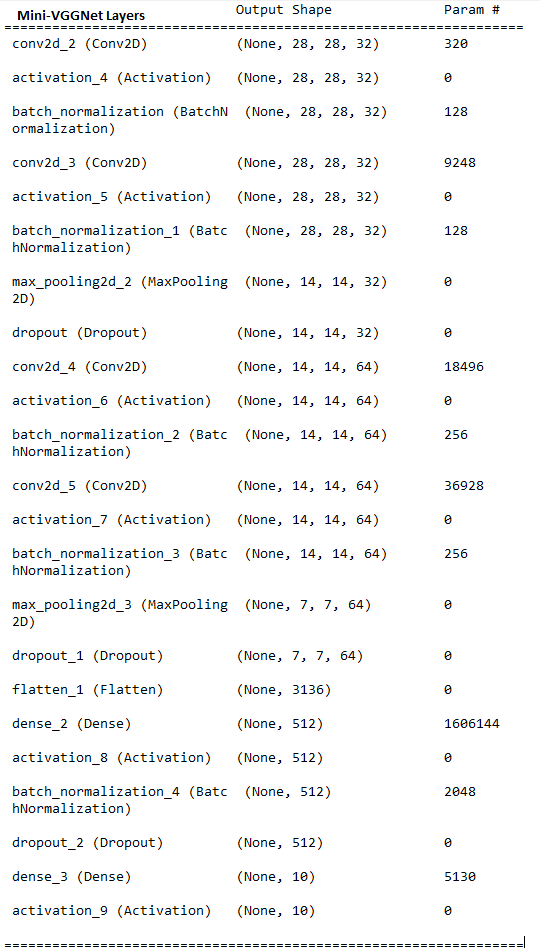


By this time, you already got an opportunity to build a CNN using different layer instances available in `keras`. So now your task is to build the model as per the descriptions provided above. We have completed some parts of the code for your reference.

In [ ]:
#Graded Activity: 2

#import two important layers from keras required this model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

class MiniVGGNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1

		# first CONV => RELU => CONV => RELU => POOL layer set
		model.add(Conv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# second CONV => RELU => CONV => RELU => POOL layer set. Refer to the model description and complete this part.
		model.add(_______________) #conv2D
		model.add(_______________)#activation
		model.add(BatchNormalization(axis=chanDim))
		model.add(_______________)#conv2D
		model.add(Activation("relu"))
		model.add(__________________)#batch normalization
		model.add(__________________)#maxpooling
		model.add(Dropout(0.25))

		# first (and only) set of FC => RELU layers. Add a fully connected layer consisting of 500 neurons and add the "relu" activation.
		model.add(Flatten())
		model.add(_______)#dense
		model.add(_______)#activation
		model.add(BatchNormalization())
		model.add(_______)#drop-out of 0.5

		# softmax classifier. Refer to the description and complete the following part.
		model.add(Dense(classes))
		model.add(_________)#softmax

		# return the constructed network architecture
		return model

Compile the new Mini-VGGNet model just like what you did before. However, instead of `SGD` optimizer, use `Adam` (https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and `categorical_crossentropy` loss function. 

In [ ]:
#Graded Activity: 3

# ------ initialize the optimizer and model
print("[INFO] compiling model-2...")
opt2 = __________
model2 = MiniVGGNet.build(width=28, height=28, depth=1, classes=10)

#Use the categorical cross entropy loss and adam optimizer
model2.compile(loss=_______, optimizer=opt2,
	metrics=["accuracy"])


Train the second model using a `batch_size` of 64 and 20 `epochs`. Note that `verbose` can take different values such as 0, 1 or 2. We recommend using the value 1 to get the details of the training. A vale of 0 will show nothing and a value of 2 will show the details without the progress bar. After 20 epochs, you will see an accuracy of ~99.11% and a validation accuracy of ~99.45% (This may not be the exact values that you will be getting, that is okay).

In [ ]:
#Graded Activity: 4
# ------ training
print("[INFO] training 2nd network...")
H = model2.fit(trainData, trainLabels,
	validation_data=(testData, testLabels), batch_size=_______,
	epochs=______, verbose=_____)

In [ ]:
# save the network to disk
print("[INFO] serializing 2nd network...")
model2.save("./")

Okay, now let us quantitatively evaluate our model with precision, recall and F1 score just like we did before.

In [ ]:
# ----- evaluate the network
print("[INFO] evaluating 2nd network...")
predictions2 = model2.predict(testData, batch_size=128)
print(classification_report(testLabels.argmax(axis=1),
	predictions2.argmax(axis=1),
	target_names=[str(x) for x in label_binarizer.classes_]))

In [ ]:
# ----- plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


Test the Mini-VGGNet using some sample images uploaded to `data` folder. Verify the results.

In [ ]:
def run_test2():
	# load the image
	img = load_image('./data/3.jpg')
	# predict the class
	predict_value = model2.predict(img)
	digit = argmax(predict_value)
	print("The digit in the given image is: "+str(digit))

# entry point, run the example
run_test2()

**Well done!** You have now implemented two convolution neural networks. We recommend you to try out different values for the hyperparameters and analyze how the tuning affects the predictions.

#**6. Evaluation Details**
The project will be explained in the recitation on Nov. 2. Then the students can complete the activites as a homework. You will get a total of 21 days to complete the activities. You have to read the instructions, refer to the slides and do all the exercises, refer to the materials as and when necessary (especially for syntaxes). The marker will evaluate your work during the recitation on Nov. 23. During the evaluation, you will be asked to show the graded activities and you may expect a couple of related questions.

**NOTE** In case you are unable to attend the recitation, you have to inform the instructor before the recitation and absence due to sickness orr other genuine grounds will be considered.

#**7. References and Acknowledgements**
1. http://yann.lecun.com/exdb/mnist/
2. Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.
3. LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), 2278-2324.
4. Project contents are based on a deep learning project done by Nikolaus Kollo.